In [3]:
import numpy as np
import pandas as pd

In [4]:
chd_train = pd.read_csv("/Users/yixuanwang/Desktop/ucb_21/IEOR_142/hw2/framingham_train.csv")
chd_test = pd.read_csv("/Users/yixuanwang/Desktop/ucb_21/IEOR_142/hw2/framingham_test.csv")

chd_train.info()
chd_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2560 entries, 0 to 2559
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             2560 non-null   int64  
 1   age              2560 non-null   int64  
 2   education        2560 non-null   object 
 3   currentSmoker    2560 non-null   int64  
 4   cigsPerDay       2560 non-null   int64  
 5   BPMeds           2560 non-null   int64  
 6   prevalentStroke  2560 non-null   int64  
 7   prevalentHyp     2560 non-null   int64  
 8   diabetes         2560 non-null   int64  
 9   totChol          2560 non-null   int64  
 10  sysBP            2560 non-null   float64
 11  diaBP            2560 non-null   float64
 12  BMI              2560 non-null   float64
 13  heartRate        2560 non-null   int64  
 14  glucose          2560 non-null   int64  
 15  TenYearCHD       2560 non-null   int64  
dtypes: float64(3), int64(12), object(1)
memory usage: 320.1+ KB


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,47,Some high school,1,40,0,0,0,0,221,144.0,91.0,35.78,85,66,0
1,1,48,High school/GED,1,17,0,0,0,0,218,113.0,79.0,27.33,62,73,0
2,0,59,Some high school,0,0,0,0,1,0,254,181.0,101.0,24.67,76,68,0
3,1,37,College,0,0,0,0,1,0,195,141.0,84.0,25.66,83,117,0
4,1,39,Some high school,1,40,0,0,0,0,251,115.0,77.0,24.01,65,98,0


In [5]:
chd_train.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000
mean,0.445703,49.596094,0.483984,8.795312,0.028906,0.005469,0.306250,0.024219,237.423047,132.255078,82.840625,25.811348,75.588281,81.853125,0.152344
std,0.497140,8.508699,0.499841,11.698651,0.167576,0.073763,0.461025,0.153758,44.958340,21.734107,11.995472,4.039092,11.979402,24.229275,0.359424
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,119.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,74.000000,23.077500,67.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,69.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,244.000000,142.500000,51.280000,143.000000,394.000000,1.000000


In [6]:
chd_train.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,47,Some high school,1,40,0,0,0,0,221,144.0,91.0,35.78,85,66,0
1,1,48,High school/GED,1,17,0,0,0,0,218,113.0,79.0,27.33,62,73,0
2,0,59,Some high school,0,0,0,0,1,0,254,181.0,101.0,24.67,76,68,0
3,1,37,College,0,0,0,0,1,0,195,141.0,84.0,25.66,83,117,0
4,1,39,Some high school,1,40,0,0,0,0,251,115.0,77.0,24.01,65,98,0


In [7]:
chd_train.shape

(2560, 16)

In [12]:
import statsmodels.formula.api as smf


In [13]:
# Fit the logistic regression model

logreg1 = smf.logit(formula = 'TenYearCHD ~ male + age + education + currentSmoker + cigsPerDay + BPMeds + prevalentStroke + prevalentHyp + diabetes +  totChol +  sysBP +  diaBP +  BMI +  heartRate +  glucose',
                   data = chd_train).fit()

print(logreg1.summary())

Optimization terminated successfully.
         Current function value: 0.378126
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 2560
Model:                          Logit   Df Residuals:                     2542
Method:                           MLE   Df Model:                           17
Date:                Thu, 22 Apr 2021   Pseudo R-squ.:                  0.1139
Time:                        15:35:25   Log-Likelihood:                -968.00
converged:                       True   LL-Null:                       -1092.5
Covariance Type:            nonrobust   LLR p-value:                 3.382e-43
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                 

### i) What is the fitted logistic regression model? Do not simply copy the results of your code, but instead state the equation used by the model to make predictions.

### coefficient * variable

y = P(TenYearCHD = 1|X) = 1/(1 + e−c),

where c = 0.5732 * male + 0.0552 * age + 0.0144 * currentSmoker + 0.0169 * cigsPerDay + 0.0590 * BPMeds - 0.0280 * prevalentStroke + 0.3388 * prevalentHyp + 0.4188 * diabetes + 0.0009 * totChol + 0.0180 * sysBP - 0.0097 * diaBP + 0.0106 * BMI - 0.0068 * heartRate + 0.0048 * glucose + 0.2273 * education[Some high school] - 0.1185 * education[college/vocational school] - 0.0131 * education[High School/GED] - 7.2609

### ii) What are the most important risk factors for 10-year CHD risk identified by the model? Pick one of these variables and describe its impact on a patient’s predicted odds of developing CHD in the next 10 years.

#### The most important risk factors are those factors with small p-values.

If we use 0.05 as our significance level, then the most important factors here are male (gender of the person), age, sysBP, and sigsPerDay. For example, men has a higher risk of developing CHD than women. If an individual is a man instead of a woman, then he has an e^0.5732 = 1.77 increase in the predicted odds of developing CHD in the next 10 years.

In [14]:
#Prediction

### iii) Suppose that you wish to determine the optimal strategy for assigning which new patients receive the medication. Given your colleague’s analysis of the costs and benefits associated with the recently approved treatment, identify a threshold value of p, call it p ̄, such that it is optimal to prescribe the medication to a patient if and only if their 10-year CHD risk exceeds p ̄.

loss from medicine treatments: 500000 * (p/5) + 50000 * (1 - p/5)
loss from no treatments: 450000 * p
Following Bayesian decision rule and setting equations equal to each other, we get a threshold of pˆ = 5/36

Thus, if a patient’s risk exceeds 0.139, we will prescribe them the medication.

In [15]:
# 1. Predicting the probability of default
y_prob = logreg1.predict(chd_test)

# 2. Determining the optimal threshold of the default probability

# 3. Predicting the label
y_pred = pd.Series([1 if x > 5/36 else 0 for x in y_prob], index=y_prob.index)

### iv) Describe the test set performance of the logistic regression model, using the threshold identified in part (iii) to separate patients into those who are at high risk for CHD (risk exceeding the threshold p) and those who are at low risk for CHD (risk below the threshold p). State the model’s accuracy, True Positive Rate (TPR), and False Positive Rate (FPR), and briefly describe these three metrics in a way that is accessible to a non-technical audience.

In [16]:
# Now we have our probabiltiy of default, we can construct a confusion matrix based on decision tree threshold we have computed 

from sklearn.metrics import confusion_matrix
y_test = chd_test['TenYearCHD']

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm) 
# Note that this confusion matrix is slightly different from the results presented in Lecture 7 slides. Those numbers
# were generated by the R program in the previous semester, which had a different random.seed and therefore a different
# train test split.

Confusion Matrix : 
 [[570 361]
 [ 53 114]]


True Positive Rate is the proportion of patients with CHD that we correctly identified - TPR

False Positve Rate is the proportion of non-CHD patients we incorrectly identified as CHD - FPR

### Accuracy = true positive + true negative / all

Accuracy = (114 + 570)(114+53+570+361) = 0.62

### TPR = true postivie / actual yes 
TPR = 114 / (114 + 53) = 0.68

### FPR = true negative / actual no 
FPR = 361 / (570 + 361) = 0.39


### v) If patients are prescribed the medication using the strategy implied by the model, use the test set data to provide an estimate(s) for the expected economic cost per patient. You should first report your estimate assuming that the CHD outcomes in the test set are not affected by the treatment decision. Is this assumption reasonable? You should then adjust your estimate in a way that takes into account the fact that the treatment decision impacts a patient’s risk of developing CHD. (Hint: keep in mind that this datase


The model’s total cost can be calculated as: 500000 * (TP) + 50000 * (FP) + 450000 * (FN) = 500000 * (114) + 50000 * (360) + 450000 * (53) = 98850000

The expected cost per patient is the total/num patients = 98850000/1098 = 90027.32 per patient

We assumed that the treatment won’t affect CHD outcomes, but this is unreasonable because if our treatment did affect CHD outcomes then the cost per patient is different. If the medication worked, we would assume among those true positive samples that would receive the medicine treatments, 80% of them would not develop CHD anymore.

In other words, the cost of 80% positive samples would decrease from 500000 to 50000 because of the effects of medication.

Our new total cost: 500000 * (0.2 * TP) + 50000 * (FP + 0.8 * TP) + 450000 * (FN) = 500000 * (0.2 * 114) + 50000 * (360 + 0.8 * 114) + 450000 * (53) = 57810000

This makes our updated expected cost per patient = 57810000/1098 = 52650.27 per patient



### vi) Consider a simple baseline model that predicts none of the patients are at high risk for CHD and therefore does not recommend treatment for any of the patients. Describe the test set performance of the baseline model in terms of accuracy, TPR, and FPR, as well as expected economic cost per patient.


In [17]:

# Baseline Model

chd_negative = np.sum(chd_train['TenYearCHD'] == 0)
chd_positive = np.sum(chd_train['TenYearCHD'] == 1)

print(pd.Series({'0': chd_negative, '1': chd_positive}))

0    2170
1     390
dtype: int64


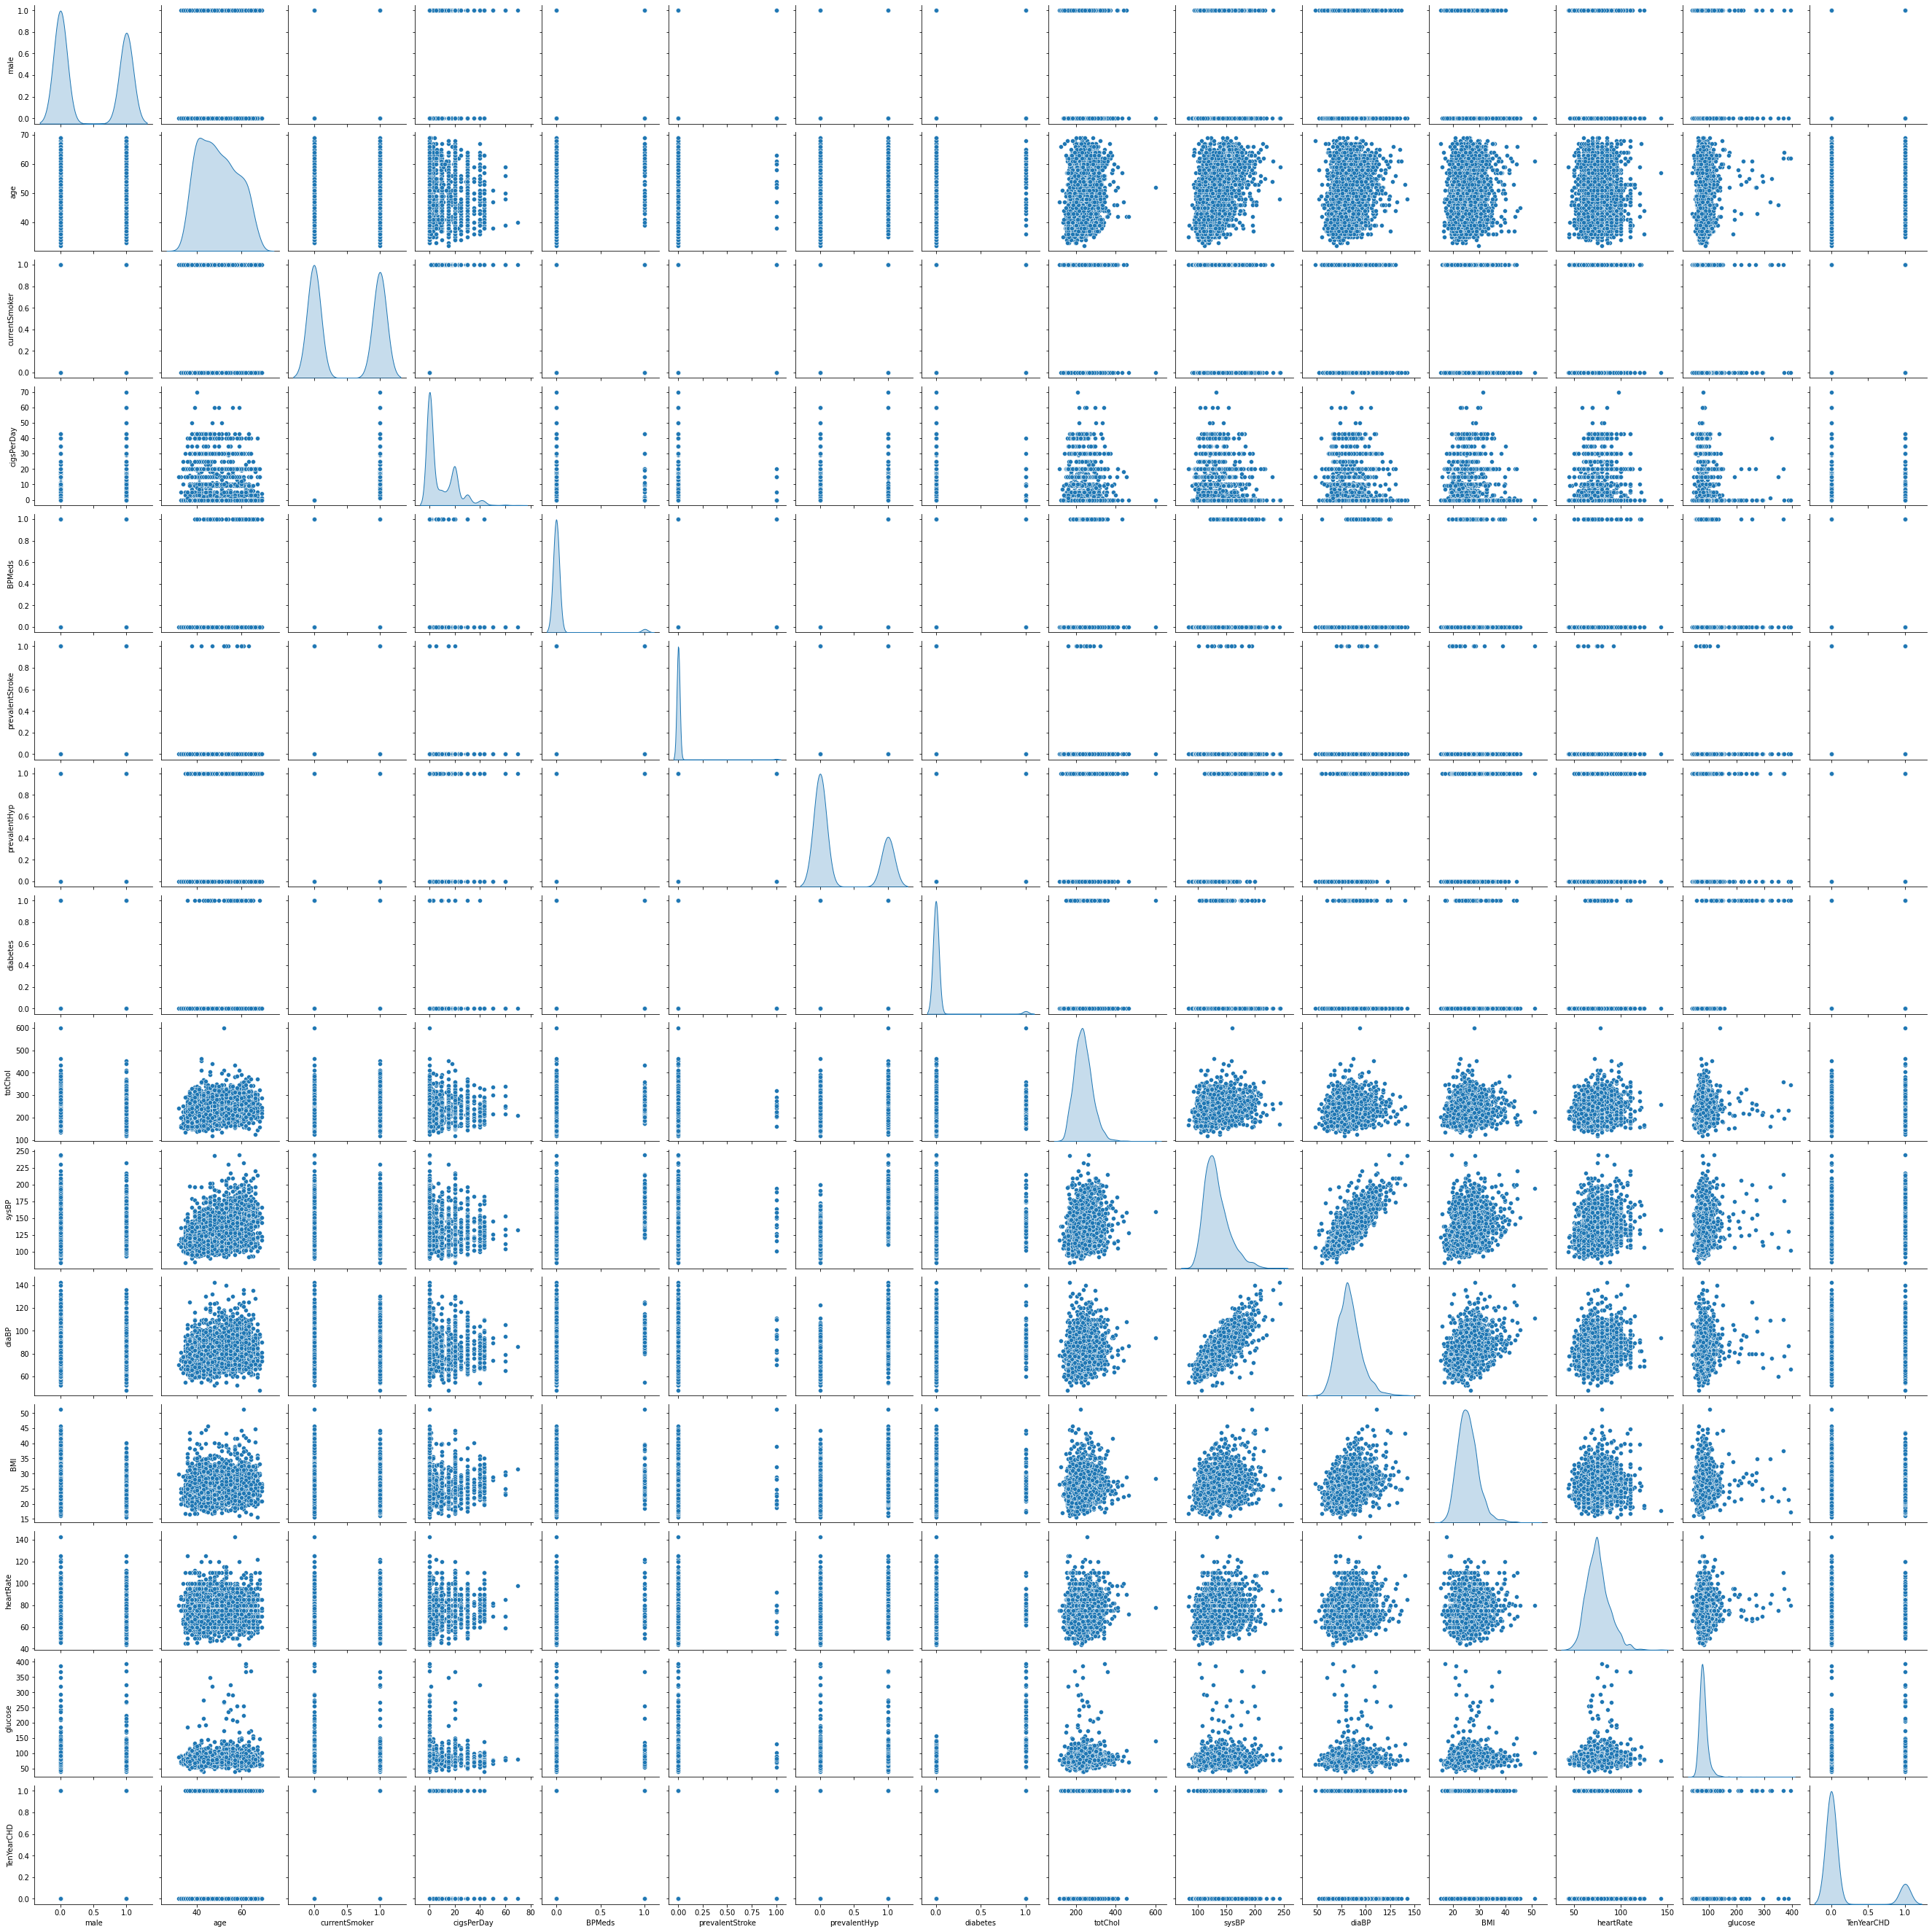

In [18]:
#use seaborn.pairplot to plot scatter plot for continuous variables
import seaborn as sns
sns.pairplot(chd_train,diag_kind='kde')

In [19]:
chd_train.corr()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.029760,0.197792,0.316375,-0.051514,-0.013212,0.000970,0.017210,-0.067903,-0.037760,0.058868,0.056004,-0.106249,0.003782,0.096611
age,-0.029760,1.000000,-0.203205,-0.180378,0.120559,0.036520,0.292946,0.106348,0.252023,0.369724,0.184934,0.121794,-0.002633,0.110617,0.220741
currentSmoker,0.197792,-0.203205,1.000000,0.776455,-0.041125,-0.029420,-0.100804,-0.030544,-0.052189,-0.123383,-0.104021,-0.149790,0.045496,-0.057274,0.013586
cigsPerDay,0.316375,-0.180378,0.776455,1.000000,-0.040436,-0.030855,-0.063944,-0.033958,-0.028198,-0.086509,-0.048562,-0.083574,0.062768,-0.052027,0.046452
BPMeds,-0.051514,0.120559,-0.041125,-0.040436,1.000000,0.113662,0.259674,0.078984,0.084116,0.260631,0.189113,0.092312,0.000675,0.055232,0.076082
prevalentStroke,-0.013212,0.036520,-0.029420,-0.030855,0.113662,1.000000,0.054153,-0.011682,0.001423,0.057752,0.049566,0.021394,-0.021332,0.005041,0.012782
prevalentHyp,0.000970,0.292946,-0.100804,-0.063944,0.259674,0.054153,1.000000,0.077247,0.158301,0.700614,0.610378,0.292076,0.128904,0.075185,0.187632
diabetes,0.017210,0.106348,-0.030544,-0.033958,0.078984,-0.011682,0.077247,1.000000,0.044250,0.114795,0.072224,0.069622,0.056121,0.628643,0.109988
totChol,-0.067903,0.252023,-0.052189,-0.028198,0.084116,0.001423,0.158301,0.044250,1.000000,0.211580,0.162416,0.119881,0.080601,0.063105,0.066697
sysBP,-0.037760,0.369724,-0.123383,-0.086509,0.260631,0.057752,0.700614,0.114795,0.211580,1.000000,0.781458,0.320102,0.183343,0.134860,0.221358


In [21]:
# Accuracy of baseline model based on training data:
ACC = chd_negative/(chd_negative + chd_positive) #Accuracy = (TP+TN)/(TP+TN+FP+FN)
ACC

0.84765625

In [22]:
# EXERCISE: Compute accuracy of baseline on testing:
chd_negative_test = np.sum(chd_test['TenYearCHD'] == 0)
chd_positive_test = np.sum(chd_test['TenYearCHD'] == 1)
ACC_test = chd_negative_test/(chd_negative_test + chd_positive_test)
print(chd_negative_test) # 乘以45万
print(chd_positive_test) # 0
ACC_test

931
167


0.8479052823315119

In [23]:
# EXERCISE: What are the TPR and FPR rates of the baseline model? 

# True negative: the proportion of actual negatives that are correctly identified as negative
# False negative: the proportion of actual positives that are incorrectly identified as negative

TPR = 0/chd_negative_test #TP/TP+FN
FPR = 0/chd_positive_test #FP/FP+TN
print(TPR,FPR)

0.0 0.0



In summary, our accuracy is good. But, this high accuracy comes from the fact that we don’t classify any samples as positive therefore our FPR is 0. The problem is we cannot identify any potential CHD patients (TPR is 0). Since the cost of wrongly identifying a positive sample as negative is much higher than the cost of wrongly identifying a negative sample as positive, this model will incur large expected costs for the patients as we see below.
Total cost per patient: 500000* (TP) + 50000 * (FP) + 450000 * (FN) = 450000 * (167) = 75150000
Expected economic cost per patient: 75150000/1098 = 68442.62

=================

### vii) Use an example to explain how to use the model in a real clinical setting. Suppose a new patient arrives, and the physician accesses the patient’s electronic medical records and retrieves the following about the patient: 

### Male, age 49, Some high school, currently a smoker with an average of 10 cigarettes per day. Not on blood pressure medication, has not had stroke, but has hypertension. Not diagnosed with diabetes; total Cholesterol at 197. Systolic/diastolic blood pressure at 140/100, BMI at 28, heart rate at 62, glucose level at 76.

### What is the predicted probability that this patient will experience CHD in the next ten years? Based on the threshold from the decision tree, should the physician prescribe the preventive medication for this patient?

In [24]:
# Fit the logistic regression model

logreg1 = smf.logit(formula = 'TenYearCHD ~ male + age + education + currentSmoker + cigsPerDay + BPMeds + prevalentStroke + prevalentHyp + diabetes +  totChol +  sysBP +  diaBP +  BMI +  heartRate +  glucose',
                   data = chd_train).fit()

print(logreg1.summary())

Optimization terminated successfully.
         Current function value: 0.378126
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 2560
Model:                          Logit   Df Residuals:                     2542
Method:                           MLE   Df Model:                           17
Date:                Thu, 22 Apr 2021   Pseudo R-squ.:                  0.1139
Time:                        16:50:06   Log-Likelihood:                -968.00
converged:                       True   LL-Null:                       -1092.5
Covariance Type:            nonrobust   LLR p-value:                 3.382e-43
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                 

In [25]:
# Remove categorical var T.High school / GED Some college/vocational school
# Create a new feature (dummy variable). 
# 3个都remove p-value都比较大

chd_train2 = chd_train.copy() 
chd_train2['High_school_or_GED'] = (chd_train2['education'] == 'High school/GED').astype('int64')
chd_train2['Some_college_or_vocational_school'] = (chd_train2['education'] == 'Some college/vocational school').astype('int64')
chd_train2['Some_high_school'] = (chd_train2['education'] == 'Some high school').astype('int64')

chd_train2.drop(columns=['education'], inplace=True)


# Let's do the same for test set as well

chd_test2 = chd_test.copy() 
chd_test2['High_school_or_GED'] = (chd_test2['education'] == 'High school/GED').astype('int64')
chd_test2['Some_college_or_vocational_school'] = (chd_test2['education'] == 'Some college/vocational school').astype('int64')
chd_test2['Some_high_school'] = (chd_test2['education'] == 'Some high school').astype('int64')
chd_test2.drop(columns=['education'], inplace=True)


chd_train2.head()


,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,High_school_or_GED,Some_college_or_vocational_school,Some_high_school
0,0,47,1,40,0,0,0,0,221,144.0,91.0,35.78,85,66,0,0,0,1
1,1,48,1,17,0,0,0,0,218,113.0,79.0,27.33,62,73,0,1,0,0
2,0,59,0,0,0,0,1,0,254,181.0,101.0,24.67,76,68,0,0,0,1
3,1,37,0,0,0,0,1,0,195,141.0,84.0,25.66,83,117,0,0,0,0
4,1,39,1,40,0,0,0,0,251,115.0,77.0,24.01,65,98,0,0,0,1


In [26]:
logreg_vii = smf.logit(formula = 'TenYearCHD ~ male + age + High_school_or_GED + Some_college_or_vocational_school + Some_high_school + cigsPerDay + prevalentStroke + prevalentHyp + diabetes +  totChol +  sysBP +  diaBP +  BMI +  heartRate +  glucose',
                       data = chd_train2).fit()
print(logreg_vii.summary())

Optimization terminated successfully.
         Current function value: 0.378135
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 2560
Model:                          Logit   Df Residuals:                     2544
Method:                           MLE   Df Model:                           15
Date:                Thu, 22 Apr 2021   Pseudo R-squ.:                  0.1139
Time:                        16:50:07   Log-Likelihood:                -968.02
converged:                       True   LL-Null:                       -1092.5
Covariance Type:            nonrobust   LLR p-value:                 2.066e-44
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -7.2611      0.828     -8

In [27]:
# Example of prediction for a new observation

new_obs = pd.DataFrame(data = {'male' : [1], 'age' : [49], 'Some_high_school' : [1],
                               'High_school_or_GED' : [0], 'Some_college_or_vocational_school' : [0],
                               'currentSmoker' : [1], 'cigsPerDay' : [10], 'BPMeds' : [0],
                              'prevalentStroke' : [0],'prevalentHyp' : [1],'diabetes' : [0],
                               'totChol' : [197], 'sysBP' : [140],'diaBP' : [100],'BMI' : [28],
                               'heartRate' : [62], 'glucose' : [76]})

logreg_vii.predict(new_obs)

0    0.219177
dtype: float64

#### From our calculations in the cell above, we have a probability of 0.22 for this patient experiencing CHD. Because this is above our threshold of 5/36, we will prescribe this patient with medication.


### b) (15 points) Show the ROC curve for your logistic regression model on the test set and describe how this curve may be helpful to decision-makers looking to further study the medication you have considered so far in this homework as well as other possible medications for preventing CHD. Describe one interesting observation implied by examining the ROC curve. What is the area under the curve (AUC) for your model in the test set?


In [40]:
y_train = chd_train2['TenYearCHD']
X_train = chd_train2.drop(['TenYearCHD'], axis=1)

y_test = chd_test2['TenYearCHD']
X_test = chd_test2.drop(['TenYearCHD'], axis=1)

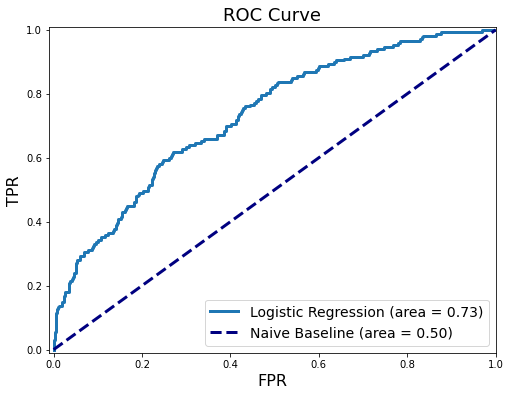

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--', label='Naive Baseline (area = 0.50)')
plt.legend(loc='lower right', fontsize=14)
plt.show()

The ROC curve is helpful because it can help us to understand the trade off between true positive rate and false positives rate, therefore can help us to choose the best threshold value. We have different costs associated with these true positive samples and false positive samples, and we want to select the point on the curve that can balance these two costs. For example, here we have 50000 loss for false positive and 500000 costs for true positive. Therefore we want a cut-off value where the true positive rate is high and false positive rate is low, which means the left upper area of the plot.
One interesting observation is that the ROC curve is above the baseline curve so it performs better than the baseline model.Our breakeven point, which is a TPR of 0.68 and a FPR of 0.39, is far away from the naive baseline, which is a sign that this model have good discriminative ability.
AUC is 0.73.

### c) (10 points) Rather than explicitly dictating which patients should receive the medication, let us consider letting patients decide for themselves. 

Suppose that if a patient has health insurance, the treatment costs for CHD (including the proposed medication) will be covered by their insurance company. However, a patient will still incur an equivalent cost of $300,000 for decreased quality of life if they develop CHD. Disregarding other factors such as side effects of the medication, if there were no insurance co-payment then it should be clear that every patient would always choose to receive the medication because it would cost them nothing and it would lower their risk of CHD. 

Thus let us consider setting a co-payment value C – the amount that each patient would have to pay in order to receive the medication – in order to provide an incentive for some patients to forego the treatment while others would choose to receive the treatment. What value of C should the insurance company charge as a co-payment for the medication in order that the patients would “self select” in a manner that is consistent with the previously examined “optimal strategy” discussed in part (a) above?

loss from meds: (C + 300000) * (p/5) + C * (1 - p/5)

loss from no meds: 300000 * p

Following Bayesian decision rule we get C = 240000 * p, where p represents the probability of developing CHD. We use the threshold we got in part (a) - > P = 5/36, get C = 33333

### d) (5 points) Are there any aspects of the analysis performed thus far that raise ethical concerns? If so, suggest at least one way that this analysis could be changed to address such concerns.

For example, one ethical question could be quantifying the decreased quality and length of life experienced by patients as 300000 dollars. Different people have different values regrading their lives. A 80 year-old person might value his/her life differently from a 20 year-old person. People already with some serious diseases might value their lives differently from healthy people. Therefore it makes sense to perform analysis on different levels of life values. Say, we calculate the threshold for different life value assumptions, let people themselves to select their own assumption and suggest the corresponding decison for them.